*Technical University of Munich<br>
Professorship of Environmental Sensing and Modeling<br><br>*
**Author:**  Daniel Kühbacher<br>
**Date:**  25.10.2024

--- 

# Plot inventory time profiles

<!--Notebook description and usage information-->


In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as dt
import matplotlib.dates as mdates
import seaborn as sns

# import custom modules
sys.path.append('../../utils')
import data_paths

In [18]:
year = 2019
folderpath = data_paths.INVENTORY_PATH + 'temporal_profiles/'

profile_fname = f'GNFR_F_hot_timeprofile_{year}.csv'
temp_profile = pd.read_csv(folderpath + profile_fname)
temp_profile['timestamp'] = pd.to_datetime(temp_profile['timestamp'])
temp_profile['scaling_factor'] = temp_profile['scaling_factor'].astype(float)
temp_profile = temp_profile.set_index(['component', 'year', 'timestamp']).sort_index()


cold_start_profile = f'GNFR_F_cold_timeprofile_{year}.csv'
temp_cold_start = pd.read_csv(folderpath + cold_start_profile)
temp_cold_start['timestamp'] = pd.to_datetime(temp_cold_start['timestamp'])
temp_cold_start['scaling_factor'] = temp_cold_start['scaling_factor'].astype(float)
temp_cold_start = temp_cold_start.set_index(['component', 'year', 'timestamp']).sort_index()

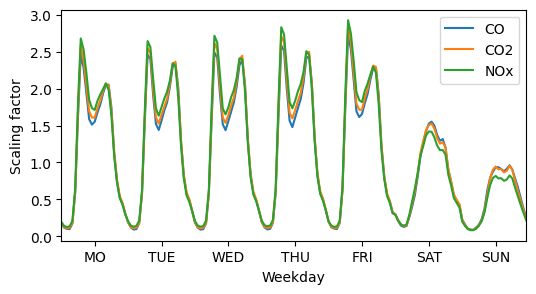

In [19]:
fig, ax = plt.subplots(figsize=(6, 3))

start_time = f'{year}-04-08'
end_time = f'{year}-04-14'

temp_profile.loc['CO', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax, label = 'CO')
temp_profile.loc['CO2(rep)', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax, label = 'CO2')
temp_profile.loc['NOx', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax, label = 'NOx')
    
xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')
ax.set_xticks(xticks)
ax.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
# Set major formatter to display the day of the week (Monday to Sunday)
plt.minorticks_off()
plt.xticks()

ax.set_xlabel('Weekday')
ax.set_ylabel('Scaling factor')
plt.legend()


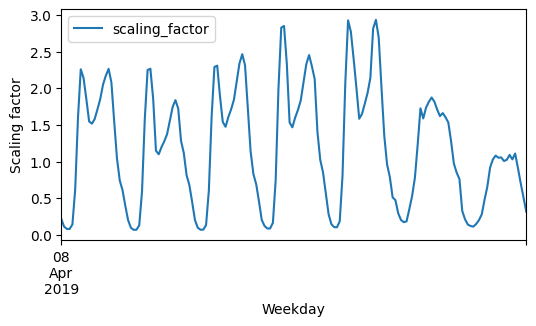

In [20]:
# now plot cold start emission timeprofiles

fig, ax = plt.subplots(figsize=(6, 3))

start_time = f'{year}-04-08'
end_time = f'{year}-04-14'

temp_cold_start.loc['CO', year].loc[start_time : end_time].plot(ax = ax, label = 'NOx')
#temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax, label = 'NOx')
#temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax, label = 'CO')


#xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')
#ax.set_xticks(xticks)
#ax.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
# Set major formatter to display the day of the week (Monday to Sunday)
plt.minorticks_off()
plt.xticks()

ax.set_xlabel('Weekday')
ax.set_ylabel('Scaling factor')
plt.legend()

plt.show()

In [21]:
temp_cold_start

scaling_factor
component    year timestamp                          
BC (exhaust) 2019 2019-01-01 00:00:00        0.196634
                  2019-01-01 01:00:00        0.157356
                  2019-01-01 02:00:00        0.106683
                  2019-01-01 03:00:00        0.087384
                  2019-01-01 04:00:00        0.079085
...                                               ...
PM2.5        2019 2019-12-31 19:00:00        0.819745
                  2019-12-31 20:00:00        0.706234
                  2019-12-31 21:00:00        0.557687
                  2019-12-31 22:00:00        0.485065
                  2019-12-31 23:00:00        0.381776

[87600 rows x 1 columns]

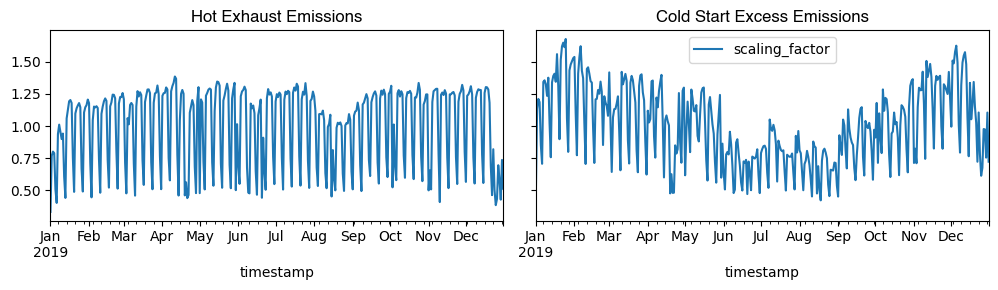

In [22]:
# make a combiend plot
fig, ax = plt.subplots(1,2, figsize=(10, 3), sharey=True, tight_layout=True)

start_time = f'{year}-01-01'
end_time = f'{year}-12-31'

temp_cold_start.loc['CO2(rep)',year].loc[start_time : end_time].resample('1d').mean(numeric_only=True).plot(ax = ax[1], label = 'CO2')
#temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax[1], label = 'NOx')
#temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax[1], label = 'CO')

temp_profile.loc['NOx', year].loc[start_time:end_time]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0], label = 'CO2')



xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')

#for x in ax: 

    #x.set_xticks(xticks)
    #x.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
    # Set major formatter to display the day of the week (Monday to Sunday)
    #x.minorticks_off()
    #plt.minorticks_off()
    #plt.xticks()
    #x.set_xlabel('Weekday', font = 'Helvetica', fontsize = 12)
    #x.set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)

ax[0].set_title('Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1].set_title('Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
 
#plt.legend()
plt.show()

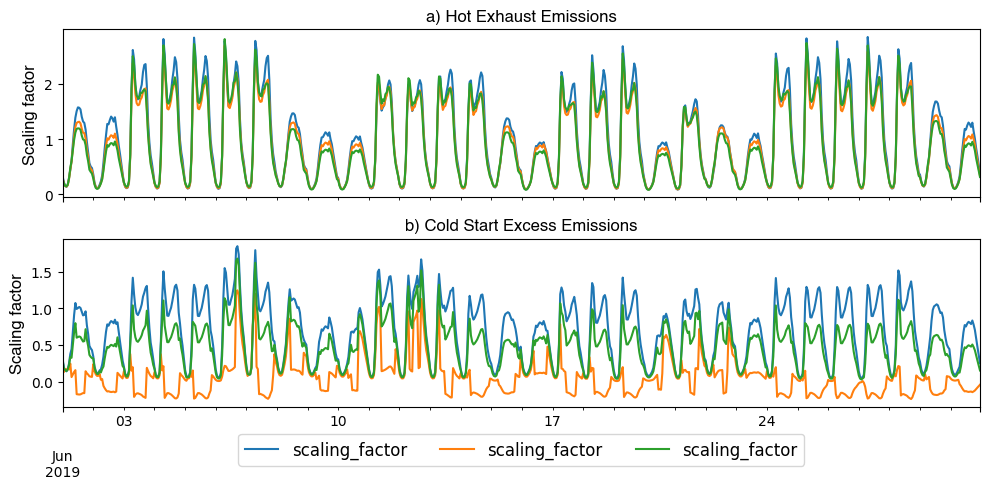

In [23]:
# make a combiend plot
fig, ax = plt.subplots(2,1, figsize=(10, 5), sharex=True, tight_layout=True)

start_time = f'{year}-06-01'
end_time = f'{year}-06-30'


temp_cold_start.loc['CO2(rep)', year].loc[start_time : end_time].plot(ax = ax[1], label = 'CO2')
temp_cold_start.loc['NOx', year].loc[start_time : end_time].plot(ax = ax[1], label = 'NOx')
temp_cold_start.loc['CO', year].loc[start_time : end_time].plot(ax = ax[1], label = 'CO')

temp_profile.loc['CO', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0], label = 'CO')
temp_profile.loc['CO2(rep)', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0], label = 'CO2')
temp_profile.loc['NOx', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0], label = 'NOx')

xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')

ax[0].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)
ax[1].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)
ax[1].set_xlabel('')

ax[0].set_title('a) Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1].set_title('b) Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
 
plt.legend(bbox_to_anchor =(0.5,-0.4), ncol = 3, loc = 'lower center', fontsize =12)
plt.show()

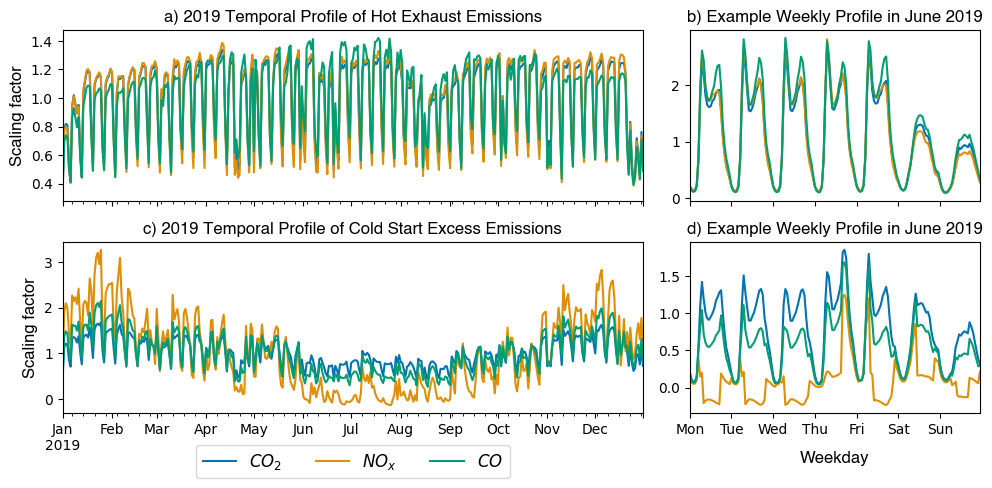

In [28]:
fig, ax = plt.subplots(2,2, figsize=(10, 5), sharex='col', tight_layout=True, width_ratios=[2, 1])

colors = sns.color_palette("colorblind")

start_time_l = f'{year}-01-01'
end_time_l = f'{year}-12-31'

temp_profile.loc['CO2(rep)', year]['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean().plot(ax = ax[0,0], label = '$CO_2$', color = colors[0])
temp_profile.loc['NOx', year]['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean().plot(ax = ax[0,0], label = '$NO_x$', color = colors[1])
temp_profile.loc['CO', year]['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean().plot(ax = ax[0,0], label = '$CO$', color = colors[2])

# cold start profiles
temp_cold_start.loc['CO2(rep)', year].loc[start_time_l:end_time_l]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[1,0], label = '$CO_2$', color = colors[0])
temp_cold_start.loc['NOx', year].loc[start_time_l:end_time_l]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[1,0], label = '$NO_x$', color = colors[1])
temp_cold_start.loc['CO', year].loc[start_time_l:end_time_l]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[1,0], label = '$CO$', color = colors[2])


start_time = f'{year}-06-03'
end_time = f'{year}-06-09'

temp_cold_start.loc['CO2(rep)', year]['scaling_factor'].loc[start_time : end_time].plot(ax = ax[1,1], label = '$CO_2$', color = colors[0])
temp_cold_start.loc['NOx', year]['scaling_factor'].loc[start_time : end_time].plot(ax = ax[1,1], label = '$NO_x$', color = colors[1])
temp_cold_start.loc['CO', year]['scaling_factor'].loc[start_time : end_time].plot(ax = ax[1,1], label = '$CO$', color = colors[2])

temp_profile.loc['CO2(rep)', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0,1], label = '$CO_2$', color = colors[0])
temp_profile.loc['NOx', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0,1], label = '$NO_x$', color = colors[1])
temp_profile.loc['CO', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0,1], label = '$CO$', color = colors[2])
    
ax[1,1].set_xticks(pd.date_range(start_time, end_time, freq='D'))
ax[1,1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',])
ax[1,1].set_xlabel('Weekday', fontsize = 12, font = 'Helvetica', labelpad = 10)
 
ax[1,0].set_xlabel(' ')
ax[1,0].legend(bbox_to_anchor =(0.5,-0.43), ncol = 3, loc = 'lower center', fontsize =12)

ax[0,0].set_title('a) 2019 Temporal Profile of Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1,0].set_title('c) 2019 Temporal Profile of Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
ax[0,1].set_title('b) Example Weekly Profile in June 2019',font = 'Helvetica', fontsize = 12)
ax[1,1].set_title('d) Example Weekly Profile in June 2019',font = 'Helvetica', fontsize = 12)

ax[1,0].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)
ax[0,0].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)

plt.show()